In [1]:
from Precode import *
import numpy
data = np.load('AllSamples.npy')
data[0]

ModuleNotFoundError: No module named 'Precode'

In [2]:
k1,i_point1,k2,i_point2 = initial_S1('1679') # please replace 0111 with your last four digit of your ID

NameError: name 'initial_S1' is not defined

In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)
print(type(i_point1))

NameError: name 'k1' is not defined

In [4]:
import pandas as pd
def ClosestPoints(data,centroid):   # p1 is full data, while p1 is centroids.
    d={}
    data_idx=0

    for p1 in data:
        closest_centroid=0
        dmin=float("inf")
        d[data_idx]=0

        for p2 in centroid:
            x1,y1,x2,y2= p1[0],p1[1],p2[0],p2[1]
            dist = ( (x1-x2)**2 + (y1 - y2)**2 ) **(1/2)
            
            if dist<dmin:
                dmin=dist
                d[data_idx]=[closest_centroid,p1[0],p1[1],dist**2]

            closest_centroid+=1

        data_idx+=1
    return d


def NewCentroids(d):

    
    df=pd.DataFrame(np.array( tuple(d.values()) ))
    intra_cluster=df.iloc[:,[0,3]].groupby(0).sum()
    intra_cluster=np.sum(intra_cluster,axis=0)
    intra_cluster=np.array(intra_cluster)
    
    new_centroids=df.iloc[:,[0,1,2]].groupby(0).mean()
   
    return intra_cluster[0] , np.array(new_centroids)




def RunKmeans(data,centroids, epochs):
    passes=0
    
    while passes<epochs:
        err, centroids=NewCentroids(ClosestPoints(data,centroids))
        #print(centroids)
        #print(err)
        
        
        passes+=1
    return centroids , err

In [5]:

RunKmeans(data,i_point1,50)

NameError: name 'data' is not defined

In [6]:
RunKmeans(data,i_point2,50)

NameError: name 'data' is not defined

In [7]:
def RandomCentroids(data,k):
    idx=np.arange(data.shape[0])
    np.random.seed(300)
    np.random.shuffle(idx)
    point_idx=idx[:k]
    return data[point_idx,:]

err_plot=[]
for k in range(2,11):
    initial_centroids=RandomCentroids(data,k)
    final_centroids , err= RunKmeans(data,initial_centroids,50)
    err_plot.append(err)

NameError: name 'data' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

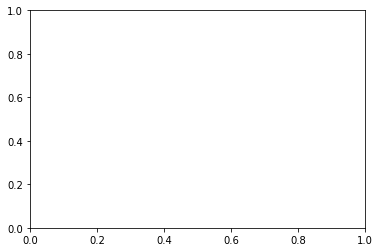

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)),err_plot)
plt.xlabel("k")
plt.ylabel("error")
plt.title("K means error using different K values part 1")